<h1><center>Attendency Project</center></h1>

## Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import face_recognition
import os
import datetime
from random import randrange
import csv
from tkinter import *
from PIL import Image, ImageTk

## Encoding Images
- Extracting 128 feature for each face in the image which are used to compare and recognize faces

In [6]:
def encoding(images):
    """ This function for encoding images to exctract 128 feature for each face.

    Args:
        images: The images which we will apply encoding.
    Returns:
        A list of images after encoding.
    """
    encode_images = []
    for image in images:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        encode_image = face_recognition.face_encodings(image)[0]
        encode_images.append(encode_image)
    return encode_images

## Access images of people and get their names

In [7]:
Images = []
Names = []
lst = os.listdir("D:/Projects/Face Recognition/Images")
for name in lst:
    image = plt.imread(f'D:/Projects/Face Recognition/Images/{name}')
    Images.append(image)
    Names.append(name[:-4])

## Apply encodnig on these images

In [8]:
encoding_images = encoding(Images)

## Creating random data for testing

## Recording Attendence

In [10]:
def recording_attendence(name):
    """ This function for recording attendence in the attendence file.

    Args:
        name: The name of recognized person.
    """

    data = pd.read_csv('D:/Attendency Project/Attendence.csv')

    today = datetime.datetime.today().strftime("%d-%B-%Y")

    ##### if the last day is not today, then create new day with today's date #####
    if data.at[data.index[-1],'Day'] != today:
        data.loc[data.index[-1]+1] = ['Absent' for i in range(len(data.columns))]
        data.at[data.index[-1],'Day'] = today
    
    ##### if it is the first time to recognize that person in that day, record it. Otherwise, he olready exist. #####
    if data.at[data.index[-1],name] == "Absent":
        data.at[data.index[-1],name] = datetime.datetime.now().strftime("%H:%M:%S")
    
    ##### Save these changes to the file. #####
    data.to_csv('D:/Attendency Project/Attendence.csv',index=False)

## Starting recognizing people
- Open web cam and recognize people

In [11]:
def starting_recognition():
    """ This function is for opening web cam and starting recognition.
    """
    ##### Open Camera #####
    video = cv2.VideoCapture(0)

    while video.isOpened():
        state, frame = video.read()
        if state:
            ##### Getting the location of detected faces in the form of (top,right,bottom,left) #####
            current_frame_faces_location = face_recognition.face_locations(frame)

            ##### Encoding the real-time image which come from web cam. #####
            current_frame_encoding = face_recognition.face_encodings(frame,current_frame_faces_location)

            ##### Loop for each face in the real-time image #####
            for encode_face, face_location in zip(current_frame_encoding,current_frame_faces_location):
                matches = face_recognition.compare_faces(encoding_images,encode_face)
                face_distance = face_recognition.face_distance(encoding_images,encode_face)
                min_distance = np.argmin(face_distance) ## The index of minimum distance

                ##### if the value (at the index of minimum distance) is true:
                if matches[min_distance]:  

                    ##### Getting the name at the index of minimum distance as is it the same person. #####
                    name = Names[min_distance]

                    ##### Drawing a rectangle around the face according to its locations. #####
                    ##### face_location ==> is a tuple (top,right,bottom,left) #####
                    cv2.rectangle(frame,(face_location[3],face_location[0]),(face_location[1],face_location[2]),(0,255,0),2)

                    ##### Puting the name of the person on the real-time image. #####
                    cv2.putText(frame,name,(face_location[3],face_location[0]-5),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)

                    ###### Recording the recognized person name. #####
                    recording_attendence(name)
                
            cv2.imshow("Image",frame)
            if cv2.waitKey(1) == ord('q'):
                break

        else:
            break

    video.release()
    cv2.destroyAllWindows()

In [67]:
starting_recognition()

In [12]:
dataset = pd.read_csv("D:/Attendency Project/Attendence.csv")
dataset

,Day,Elon Mask,Ahmed Zewail,Jeff Bezos
0,01-November-2021,08:51:50,09:24:14,Absent
1,02-November-2021,10:02:19,10:42:14,Absent
2,03-November-2021,08:19:44,08:53:33,Absent
3,04-November-2021,09:02:55,10:14:25,08:15:46
4,05-November-2021,08:03:21,Absent,10:40:06
...,...,...,...,...
198,18-May-2022,08:25:48,09:06:13,Absent
199,19-May-2022,08:43:43,09:03:37,09:58:06
200,20-May-2022,10:56:46,09:57:29,08:16:53
201,21-May-2022,10:32:00,Absent,10:20:01


## Calculating minimum and maximum absence for people

In [13]:
def min_max_absence():
    """ This function is for calculating the minimum and maximum absence for people.

    Args:
        Absence of persons
    """
    Elon_Mask_Absence = dataset['Elon Mask'].value_counts()['Absent']
    Person2_Absence = dataset['Ahmed Zewail'].value_counts()['Absent']
    Person3_Absence = dataset['Jeff Bezos'].value_counts()['Absent']
    mn = min(Elon_Mask_Absence,Person2_Absence,Person3_Absence)
    mx = max(Elon_Mask_Absence,Person2_Absence,Person3_Absence)
    for column in dataset.columns:
        if column == "Day":
            continue
        if dataset[column].value_counts()['Absent'] == mn: a = column
        if dataset[column].value_counts()['Absent'] == mx: b = column
    print(f"Minimum absnece is for \"{a}\" ,,, with {mn} days of absence")
    print(f"Maximum absnece is for \"{b}\" ,,, with {mx} days of absence")
    screen3 = Tk()
    screen3.geometry('800x300')
    screen3.title("Attendency System")
    screen3.iconbitmap('D:/Attendency Project/Images/icon.ico')
    label100 = Label(screen3,text=f"Minimum absnece is for \"{a}\" ,,, with {mn} days of absence\n\nMaximum absnece is for \"{b}\" ,,, with {mx} days of absence",font=('normal',15))
    label100.place(x=0,y=0)
    screen3.mainloop()

In [14]:
Elon_Mask_Absence = dataset['Elon Mask'].value_counts()['Absent']
Person2_Absence = dataset['Ahmed Zewail'].value_counts()['Absent']
Person3_Absence = dataset['Jeff Bezos'].value_counts()['Absent']

min_max_absence()

Minimum absnece is for "Elon Mask" ,,, with 34 days of absence
Maximum absnece is for "Ahmed Zewail" ,,, with 46 days of absence


## Plotting attendence Vs absence of people

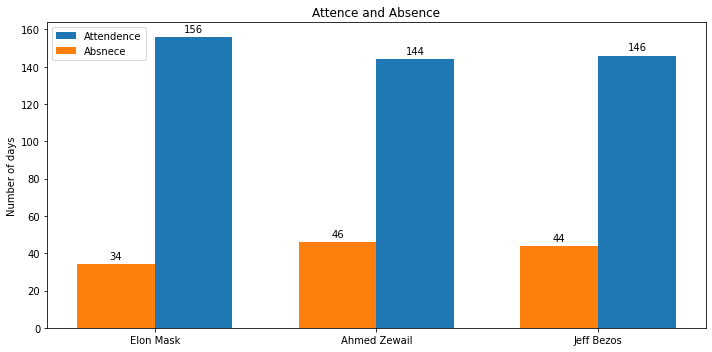

In [15]:
def plotting_all_attendence(): 
    names = []
    for column in dataset.columns:
        if column == "Day":
            continue
        names.append(column)
    width = 0.35
    x = np.arange(len(names))
    fig, ax = plt.subplots()
    rects1 = ax.bar(x+width/2, [190-Elon_Mask_Absence,190-Person2_Absence,190-Person3_Absence],width,label='Attendence')
    rects2 = ax.bar(x-width/2, [Elon_Mask_Absence,Person2_Absence,Person3_Absence], width, label='Absnece')

    ax.set_ylabel("Number of days")
    ax.set_title("Attence and Absence")
    ax.set_xticks(x,names)
    ax.legend()

    fig.set_figheight(5)
    fig.set_figwidth(10)

    ax.bar_label(rects1,padding=3)
    ax.bar_label(rects2,padding=3)
    fig.tight_layout()
    plt.savefig('D:/Attendency Project/matplotlib images/output1.png')

plotting_all_attendence()

## Getting each month and its days of attendence in last year

In [16]:
def months_attendance(name):
    months = dict()
    count = 0
    month = "November"
    for i in range(190): # 364 no.of days in 2021
        if dataset.at[i,'Day'][3:-5] != month:
            months[month] = count
            month = dataset.at[i,'Day'][3:-5]
            count = 0
        if dataset.at[i,name] != "Absent":
            count += 1

    return months
months_attendance("Elon Mask")

{'November': 26,
 'December': 27,
 'January': 26,
 'February': 22,
 'March': 26,
 'April': 23}

## Plotting last year attendence

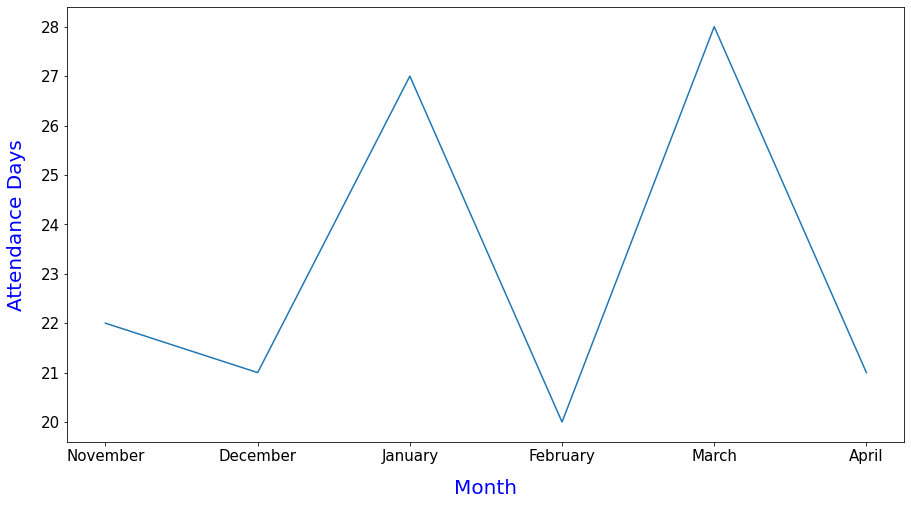

In [17]:
def plotting_person_attendence(name):
    fig,ax = plt.subplots()
    ax.plot(months_attendance(name).keys(),months_attendance(name).values())
    plt.xlabel('Month',fontsize=20,color='b',labelpad=15)
    plt.xticks(fontsize=15)
    plt.ylabel('Attendance Days',fontsize=20,color='b',labelpad=15)
    plt.yticks(fontsize=15)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    
    plt.savefig('D:/Attendency Project/matplotlib images/output.png')
plotting_person_attendence('Ahmed Zewail')

<h1><Center>UI</Center></h1>

## Importing Libraries

In [18]:
from tkinter import *
import tkinter.font as fnt

## Getting attendence data

In [19]:
def getting_attendence_data():
    screen = Tk()
    screen.title("All Data")
    screen.iconbitmap('D:/Attendency Project/Images/icon.ico')

    col_names = ('Day','Elon Mask','Ahmed Zewail','Jeff Bezos')
    for i,col_name in enumerate(col_names,start=0):
        Label(screen,text=col_name).grid(row=3, column=i, padx=40)

    with open('D:/Attendency Project/Attendence.csv','r',newline="") as file:
        reader = csv.reader(file)
        data = list(reader)

    entrieslist = []
    for i, row in enumerate(data, start=0):
        entrieslist.append(row[0])
        for col in range(4):
            Label(screen,text=row[col]).grid(row=i, column=col)
    screen.mainloop()

## Data for one person

In [20]:
def search_data(name):
    screen = Tk()
    screen.title(f"{name} Data")
    screen.iconbitmap('D:/Attendency Project/Images/icon.ico')
    screen.geometry('500x600+750+100')
    names = ['Elon Mask','Ahmed Zewail','Jeff Bezos']
    index = 0
    for i,j in enumerate(names):
        if name == j:
            index = i+1

    col_names = ('Day',name)
   
    for i,col_name in enumerate(col_names):
        Label(screen,text=col_name).grid(row=2, column=i, padx=70)
    
    with open('D:/Attendency Project/Attendence.csv','r',newline="") as file:
        reader = csv.reader(file)
        data = list(reader)

    entrieslist = []
    for i, row in enumerate(data):
        entrieslist.append(row[0])
        for x,j in enumerate([0,index]):
            Label(screen,text=row[j]).grid(row=i, column=x)
   
    screen.mainloop()

## Person Analysis

## Creating widgets

In [23]:
class MainWindow():
    def __init__(self,main_window):
        self.controler = 0
        self.main_window()

    def main_window(self):
        root.title("Attendency System")
        root.iconbitmap('D:/Attendency Project/Images/icon.ico')
        root.config(bg='#003366')
        
        ####################### "Welcome to Attendency" Label ####################
        self.main_label = Label(root,text='Welcome to Attendency',font=('Courier', 40),fg='white',bg='#003366')
        self.main_label.pack(padx=100,pady=50)

        ###################### Image #######################
        self.main_img = PhotoImage(file="D:/Attendency Project/Images/img1.png")
        self.imglabel = Label(root,image = self.main_img)
        self.imglabel.place(x=550,y=180,width=400,height=280)

        ###################### "Start" Button ##################
        self.main_button = Button(root,text='Start',bg='#cc3300',fg='white',activebackground='Slate Gray',font=fnt.Font(size = 30),width=15,height=2)
        self.main_button.place(x=610,y=530,width=270,height=80)
        self.main_button.bind('<Button-1>',self.second_window)

     

        self.gui_elements = [self.main_button,self.main_label,self.imglabel]

    def second_window(self,event):

        self.remove_elements(self.gui_elements)
        root.config(bg='#003366')

        #################### "Attendency" Label #####################
        self.second_label1 = Label(root,text="Attendency",font=('Courier', 40),fg='white',bg='#003366')
        self.second_label1.place(x=240,y=50)

        ################### "Open Camera" Button ####################
        self.second_button1 = Button(root,text="Open Camera",command=starting_recognition,bg='#cc3300',fg='white',activebackground='Slate Gray',font=fnt.Font(size = 25),width=10,height=2)
        self.second_button1.place(x=240,y=150,width=320,height=70)

        ################### "Person" Label ######################
        self.second_label2 = Label(root,text="Person: ",font=('normal', 25),fg='white',bg='#003366')
        self.second_label2.place(x=30,y=330)
        
        #################### Drop Down list #####################
        def button2_func():
            search_data(self.second_clicked.get())
        
        def button3_func():
            screen50 = Tk()
            img1111 = PhotoImage(file='D:/Attendency Project/Images/img2.png')
            label_img1111 = Label(screen50,image =img1111)
            label_img1111.place(x=0,y = 0,width=100,height=100)

            screen50.mainloop()

        names = ['Elon Mask','Ahmed Zewail','Jeff Bezos']
        self.second_clicked = StringVar()
        self.second_clicked.set("Person Name")

        self.drop = OptionMenu( root , self.second_clicked , *names,command=button2_func)
        self.drop.config(bg='#003366',fg='white',font=('normal',23),activebackground='#003366',activeforeground='white')
        self.drop.place(x=150,y=335,width=550,height=50)

        self.drop['menu'].config(bg="#003366",fg='white',font=('normal',20),activeforeground='white')
        self.drop.place(x=150,y=335,width=550,height=50)

        ######################## "Person data" Button ##############
        self.second_button2 = Button(root,text="Person Data",bg='#cc3300',command=button2_func,fg='white',activebackground='Slate Gray',font=fnt.Font(size = 20),width=10,height=2)
        self.second_button2.place(x=150,y=420,width=250,height=70)

        ######################## "Attendence Analysis" Button ########
        self.second_button3 = Button(root,text="Attendence Analysis",command=button3_func,bg='#cc3300',fg='white',activebackground='Slate Gray',font=fnt.Font(size = 20),width=10,height=2)
        self.second_button3.place(x=410,y=420,width=290,height=70)


        ######################## "Display All Data" ###################
        self.second_button4 = Button(root,text="Display All Data",command=getting_attendence_data,bg='#cc3300',fg='white',activebackground='Slate Gray',font=fnt.Font(size = 20),width=10,height=2)
        self.second_button4.place(x=410,y=530,width=290,height=70)

        ###################### "Min&Max Absence" Buttton ############
        self.second_button5 = Button(root,text="Min&Max Absence",bg='#cc3300',command=min_max_absence,fg='white',activebackground='Slate Gray',font=fnt.Font(size = 20),width=10,height=2)
        self.second_button5.place(x=150,y=530,width=250,height=70)

        ##################### Image ###########################
        self.second_img = PhotoImage(file="D:/Attendency Project/Images/img2.png")
        self.second_imglabel = Label(root,image = self.second_img)
        self.second_imglabel.place(x=770,y=0,width=770,height=810)
 
        

         
    
    def remove_elements(self, elements):
        for element in elements:
            element.destroy()


def main():
    global root
    root = Tk()
    root.geometry('1540x810+-7+-2')
    root.resizable(False,False)
    MainWindow(root)

    root.mainloop()
main()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python38\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "c:\Program Files\Python38\lib\tkinter\__init__.py", line 3948, in __call__
    self.__callback(self.__value, *args)
TypeError: button2_func() takes 0 positional arguments but 1 was given
